##              Supervised Machine Learning


###                          Linear Regression Model 
### Predict the percentage of an student based on the no. of study hours.


### Author: Krishna Prajapati

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
s_p_data=pd.read_csv("http://bit.ly/w-data")
print("data is succesfully loaded in s_p_data") 

data is succesfully loaded in s_p_data


In [3]:
s_p_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Preparing the Dataset

In [4]:
s_p_data.shape  # To determine the shape of dataset

(25, 2)

In [5]:
s_p_data.info() # To get the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
s_p_data.describe() # To describe the dataset statistically

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
s_p_data.isna().sum() # To find the null values in the dataset

Hours     0
Scores    0
dtype: int64

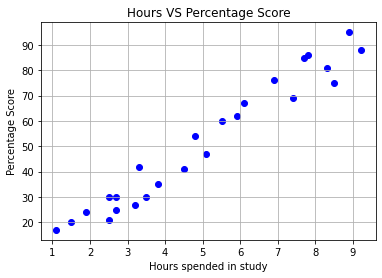

In [6]:
#plotting the datas 
plt.scatter(s_p_data.iloc[:,0],s_p_data.iloc[:,1],color="blue")
plt.xlabel("Hours spended in study")
plt.ylabel("Percentage Score")
plt.title("Hours VS Percentage Score")
plt.grid()
plt.show()

### Gettting the required datas from the s_p_data for training the algortithm

In [7]:
x=s_p_data.iloc[:,0].values
y=s_p_data.iloc[:,1].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [10]:
# importing the library  for spliting the datas for train  and test the models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [11]:
# training of the Alogorithm
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train,y_train)
print("Training complete")

Training complete


###       Prediction of the trained algorithm 

In [12]:
#predicting the trained Algorithm and compare it with the actual datas
predicted_values=Lr.predict(x_test)
y_pred=pd.DataFrame(predicted_values)
df=pd.DataFrame(y_test)
df=pd.concat([df,y_pred],axis=1)
df.columns=["Actual","Y_pred"]
df

,Actual,Y_pred
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Plotting the regression line and datas

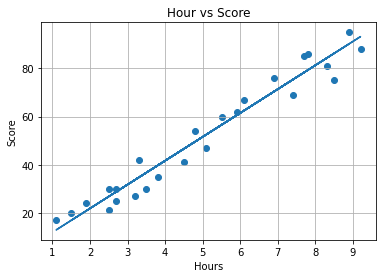

In [16]:
#plotting the regression  lines 
line = Lr.coef_*x+Lr.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Hour vs Score")
plt.grid()
plt.show()

### Evaluating the model

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


In [21]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
r2=r2_score(y_test,y_pred)

In [22]:
print(" r2_score={}".format(r2)) #model is trained approx 95% which is good

 r2_score=0.9454906892105356


In [24]:
print("Mean_absolute_error={}".format(MAE)) #mean absolute error

Mean_absolute_error=4.183859899002975


In [26]:
print("Mean_squared_error={}".format(MSE)) #mean squared error

Mean_squared_error=21.5987693072174


In [27]:
print("Root_mean_squared_error={}".format(RMSE))  #root mean squared error

Root_mean_squared_error=4.6474476121003665


In [29]:
# To find mean absolute percentage error
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred)/y_true)*100
MAPE=mean_absolute_percentage_error(y_test,y_pred)
print("Mean_absolute_percentage_error={}".format(MAPE))

Mean_absolute_percentage_error=12.568891617045663


###  What will be predicted score if a student studies for 9.25 hrs/ day?

In [31]:
hours = 9.25
hours=np.array(hours)
pred = Lr.predict(hours.reshape(-1,1))
print("No of Hours = ",hours)
print("Predicted Score ={}".format(pred[0]))


No of Hours =  9.25
Predicted Score =[93.69173249]


### predicted score is 93.69 = approx 94 ,if a student studies for 9.25hrs/day.

## Thankyou